### Fruits With Color Data Set

https://www.kaggle.com/mjamilmoughal/fruits-with-colors-dataset



In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [61]:
df = pd.read_table("fruit_data_with_colors.txt")
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [62]:
df.shape

(59, 7)

In [63]:
# list the unique fruits in the df["fruit_name"] column
df.fruit_name.unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [64]:
# list the unique fruit labels in the df["fruit_label"] column
# also confirms that "fruit_label" and "fruit_name" are associated (fruit_label: 1 = fruit_name: apple)
df.fruit_label.unique()

array([1, 2, 3, 4], dtype=int64)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.3+ KB


In [66]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


#### Clean data

In [67]:
# remove the "fruit_label" column, since it is associated with "fruit_name"
df.drop(["fruit_label"], axis = 1, inplace = True)

In [68]:
df.head()

,fruit_name,fruit_subtype,mass,width,height,color_score
0,apple,granny_smith,192,8.4,7.3,0.55
1,apple,granny_smith,180,8.0,6.8,0.59
2,apple,granny_smith,176,7.4,7.2,0.60
3,mandarin,mandarin,86,6.2,4.7,0.80
4,mandarin,mandarin,84,6.0,4.6,0.79


In [69]:
df.shape

(59, 6)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.8+ KB


In [71]:
df.describe()

,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000
mean,163.118644,7.105085,7.693220,0.762881
std,55.018832,0.816938,1.361017,0.076857
min,76.000000,5.800000,4.000000,0.550000
25%,140.000000,6.600000,7.200000,0.720000
50%,158.000000,7.200000,7.600000,0.750000
75%,177.000000,7.500000,8.200000,0.810000
max,362.000000,9.600000,10.500000,0.930000


#### EDA

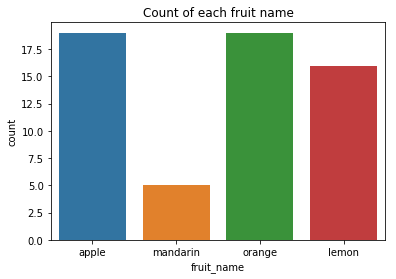

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


In [99]:
sns.countplot(df["fruit_name"], label = "Count")
plt.title("Count of each fruit name")
plt.show()
print(df.groupby("fruit_name").size())

In [101]:
X = df[["mass", "width", "height", "color_score"]]
y = df["fruit_name"]

Text(0.5,0.98,'Scatter plot for each input variable')

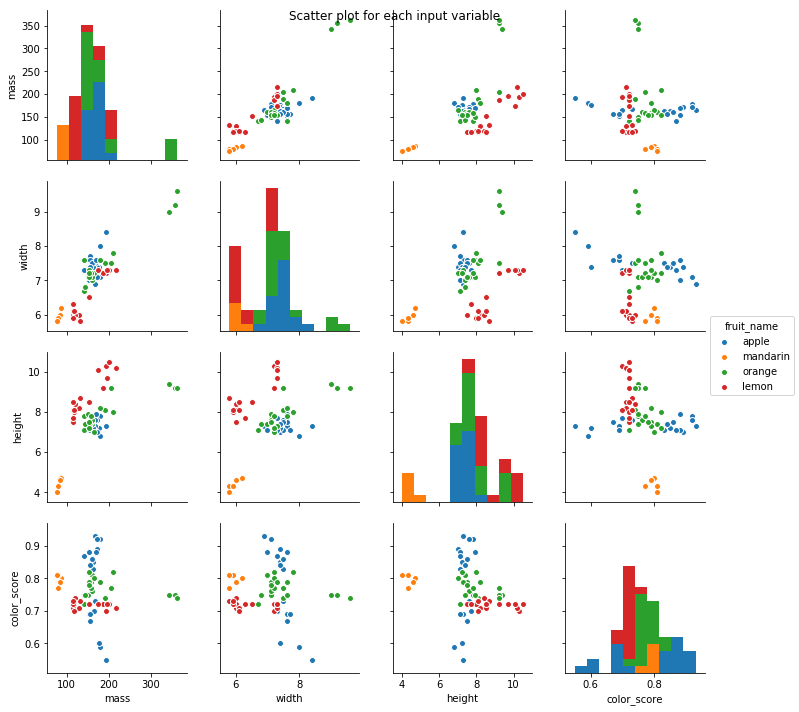

In [102]:
sns.pairplot(df, hue = "fruit_name")
plt.suptitle("Scatter plot for each input variable")

#### Data Preprocessing

In [112]:
# Split the data into training and testing
seed = 42
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed)

# Apply scaling
# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#scale = StandardScaler()
#scale.fit(X_train)
#X_train = scale.transform(X_train)
#X_test = scale.transform(X_test)


#### Build Models
#### Logistic Regression

In [116]:
# from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(log_reg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(log_reg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.61
Accuracy of Logistic regression classifier on test set: 0.53


In [117]:
# import KNeighborsClassifer from sklearn.neighbors, to create a classifer object
knn = KNeighborsClassifier(n_neighbors = 5)

# train the classifer using the training data
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.93
